# Dataset Exploration Notebook

## Introduction
This notebook demonstrates the process of securely accessing a dataset stored in Google Sheets using the Google Cloud Platform (GCP) Service Account. This initial section outlines key milestones achieved to set up a secure and efficient workflow for this project.

## Milestones Achieved
1. **GCP Service Account Configuration**:
   - Successfully created and configured a GCP Service Account to access the Google Sheets API.
   - Shared the dataset file in Google Sheets with the service account email to grant edit permissions.

2. **Secure Credential Management**:
   - Implemented the use of environment variables to securely store and access the path to the service account JSON file.
   - Ensured the JSON credentials file is not committed to the repository by:
     - Adding the `secrets/` directory and `.env` file to the `.gitignore`.
     - Setting up environment variables dynamically during virtual environment activation.

3. **Virtual Environment Setup**:
   - Created and utilized a Python virtual environment for package management.
   - Ensured the virtual environment includes all required dependencies, isolating the project environment from the global system.

4. **Data Access**:
   - Successfully retrieved the dataset from Google Sheets into a Pandas DataFrame for analysis, confirming seamless integration between GCP and the project.



---


The code below does the following:
- Imports the necessary libraries: 

    -`os` to extract environment variables.

    -`Credentials` class from the `google.oauth2.service_account` module for authenticating the service account.

In [3]:
import os
from google.oauth2.service_account import Credentials

# Get the path from the environment variable
json_path = os.getenv("GOOGLE_APPLICATION_CREDENTIALS")


The 'GOOGLE_APPLICATION_CREDENTIALS' environment variable is set to the path of the service account JSON file. This variable is used by the Google Cloud client libraries to locate the service account credentials.

Now, as the next step we can import the following libraries:

- `gspread` to interact with Google Sheets.
- `pandas` to work with the dataset.


Also, some classes, such as `Credentials` from the `google.oauth2.service_account` module, and `Request` from the `google.auth.transport.requests` module are imported to authenticate the service account and make requests to the Google Sheets API.



In [4]:
import gspread
from google.auth.transport.requests import Request
from google.oauth2.service_account import Credentials
import pandas as pd

Now, we will get the environment variable that holds the path to the gcp service account .json file, which is not commited to this repository (included in the .gitignore file). If you wish to do the same I recommend to edit the activate script of your virtual environment to set the environment variable every time you activate it. 

the `getenv` function from the `os` module is used to get the value of the 'GOOGLE_APPLICATION_CREDENTIALS' environment variable and saves it into the `json_path` variable.

In [5]:
json_path = os.getenv("GOOGLE_APPLICATION_CREDENTIALS")
if not json_path:
    raise FileNotFoundError("Environment variable GOOGLE_APPLICATION_CREDENTIALS is not set or file path is invalid.")

then, the `json_path` variable is used to authenticate the service account and access the Google Sheets API. The `Credentials.from_service_account_file` method is used to create credentials from the service account JSON file.

In [6]:
# Step 2: Authenticate using the service account JSON file
scopes = ["https://www.googleapis.com/auth/spreadsheets.readonly"]
credentials = Credentials.from_service_account_file(json_path, scopes=scopes)

now the `gspread.authorize` method is used to authenticate the service account and access the Google Sheets API. 

this information is saved in the `client` variable, which is used to access the Google Sheets API.

In [7]:
# Step 3: Authorize the gspread client
client = gspread.authorize(credentials)

now, we can pass the spreadsheet url to the `open_by_url` method of the `client` object to access the Google Sheets file. 

In [8]:
# Step 4: Open the Google Sheet by URL
spreadsheet_url = "https://docs.google.com/spreadsheets/d/1f7jIcEzhLiO2EhVZro8oUdNgm2AGaC5po8QNiuQggG4/edit?usp=sharing"
spreadsheet = client.open_by_url(spreadsheet_url)

Now we select the first worksheet of the Google Sheets file using the `get_worksheet` method of the `spreadsheet` object.

In [9]:
# Step 5: Select the worksheet (e.g., first worksheet)
worksheet = spreadsheet.get_worksheet(0)

Once the worksheet is selected, we can fetch all the records from the worksheets as a list of dictionaries. This is done using the `get_all_records` method of the `worksheet` object.

Then, we can convert the list of dictionaries to a Pandas DataFrame using the `pd.DataFrame` constructor. This will allow us to perform data analysis and visualization on the dataset.

Finally, we can display the first few rows of the dataset using the `head` method of the Pandas DataFrame.  


In [ ]:
# Step 6: Load data into a pandas DataFrame
data = worksheet.get_all_records()
df = pd.DataFrame(data)

# Display the first few rows
print(df.head())


Now that we have access to the data, we can proceed to do some Exploratory Data Analysis.

# Exploratory Data Analysis

The particular interest of this project is explore information related to what disntinguishes claim videos from opinion videos.

Now we will assess the data. we already checked the dataset contents using the .head() method, now we will check the data types of the columns using the .info() method.

In [ ]:
df.info(
)

Descriptive statistics can also be used in this stage of EDA to summarize the central tendency, dispersion, and shape of the dataset’s distribution. This can be done using the .describe() method.

In [ ]:
df.describe()

## Analyisis of numerical variables

Now to assess the distributions of the variables and identify outliers, we can create box plots for the numerical columns and histograms for the categorical columns. 

To organize this process we can separate the numerical variables and assess them first, the numerical variables are:

* video_duration_sec 
* video_view_count         
* video_like_count           
* video_share_count         
* video_download_count      
* video_comment_count   

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of numerical columns
numerical_columns = [
    'video_duration_sec', 
    'video_view_count', 
    'video_like_count', 
    'video_share_count', 
    'video_download_count', 
    'video_comment_count'
]

# Convert columns to numeric, coercing errors to NaN
for col in numerical_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Create a figure and axes
fig, axes = plt.subplots(6, 2, figsize=(15, 30))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each numerical column as a horizontal boxplot and histogram
for i, col in enumerate(numerical_columns):
    sns.boxplot(x=df[col], ax=axes[2*i], orient='h')
    axes[2*i].set_title(f'Boxplot of {col}')
    
    sns.histplot(df[col], ax=axes[2*i + 1], kde=True)
    axes[2*i + 1].set_title(f'Histogram of {col}')

# Adjust layout
plt.tight_layout()
plt.show()



all variables behave in a similar manner, where the majority of the data is concentrated in the lower values, with outliers in the higher values. except **video duration**, which has a more uniform distribution.

## Analysis of categorical variables:

### Claim by verification status  

the variable `claim_status` has information about whether the published video has been identified as an “opinion” or a “claim.” In this dataset, an “opinion” refers to an individual’s or group’s personal belief or thought. A “claim” refers to information that is either unsourced or from a unverified source.

`verified_Status` Indicates the status of the TikTok user who published the video in terms of their verification, either “verified” or “not verified.” 

To show how these two categorical variables are related, we can plot two bar plots side by side to compare the distribution of the `claim_status` and `verified_status` variables.

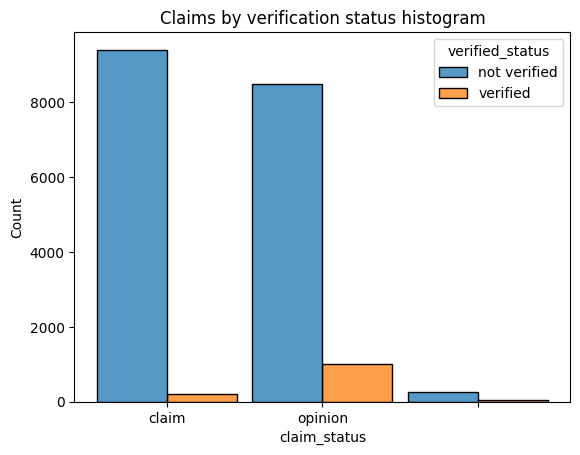

In [24]:
sns.histplot(data=df,
             x='claim_status',
             hue='verified_status',
             multiple='dodge',
             shrink=0.9)
plt.title('Claims by verification status histogram')
plt.show()

this plot is giving us important information for this stage of the data exploration process, besides the actual shapes of the verified status in the claim and opinion groups, there is a third group of videos that are not classified as either claim or opinion, and this group has a higher proportion of non verified users.